<a href="https://colab.research.google.com/github/aayush1324/Scaler_DSML2022/blob/main/YULU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import binom , norm , poisson , expon ,geom

In [3]:
from scipy.stats import ttest_ind , ttest_rel , f_oneway , kruskal
from scipy.stats import norm , chi2 , f
from scipy.stats import chi2_contingency , chisquare
from scipy.stats import pearsonr , spearmanr
from scipy.stats import kstest

In [4]:
! wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089" -O Yulu.csv

--2022-11-16 06:40:42--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.170.67, 99.84.170.112, 99.84.170.22, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.170.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘Yulu.csv’

Yulu.csv            100%[===================>] 633.16K   788KB/s    in 0.8s    

2022-11-16 06:40:44 (788 KB/s) - ‘Yulu.csv’ saved [648353/648353]



In [5]:
df = pd.read_csv("Yulu.csv")

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
df.describe(include = object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [10]:
len(df)

10886

In [11]:
df.shape

(10886, 12)

In [12]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [13]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

***Conversion*** From Integer to Categorical Feature of 4 Columns such as :-

1. Season
2. Holiday
3. Weather
4. WorkingDay

In [164]:
df["season"] = df["season"].astype('category')

In [166]:
df["holiday"] = df["holiday"].astype('category')

In [170]:
df["workingday"] = df["workingday"].astype('category')

In [168]:
df["weather"] = df["weather"].astype('category')

In [171]:
df.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

***Categorical Features***

1. Season
2. Holiday
3. Working Day
4. Weather
5. Datetime

***Numerical Features***

1. Count
2. Temp
3. aTemp
4. Humidity
5. Windspeed
6. Casual
7. Registered

# **Value** Counts 

In [14]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [15]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [16]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [17]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [173]:
df["temp"].value_counts().sort_index()

0.82       7
1.64       2
2.46       5
3.28      11
4.10      44
4.92      60
5.74     107
6.56     146
7.38     106
8.20     229
9.02     248
9.84     294
10.66    332
11.48    181
12.30    385
13.12    356
13.94    413
14.76    467
15.58    255
16.40    400
17.22    356
18.04    328
18.86    406
19.68    170
20.50    327
21.32    362
22.14    403
22.96    395
23.78    203
24.60    390
25.42    403
26.24    453
27.06    394
27.88    224
28.70    427
29.52    353
30.34    299
31.16    242
31.98     98
32.80    202
33.62    130
34.44     80
35.26     76
36.08     23
36.90     46
37.72     34
38.54      7
39.36      6
41.00      1
Name: temp, dtype: int64

In [174]:
df["atemp"].value_counts().sort_index()

0.760       2
1.515       1
2.275       7
3.030       7
3.790      16
4.545      11
5.305      25
6.060      73
6.820      63
7.575      75
8.335      63
9.090     107
9.850     127
10.605    166
11.365    271
12.120    195
12.880    247
13.635    237
14.395    269
15.150    338
15.910    254
16.665    381
17.425    314
18.180    123
18.940     45
19.695    255
20.455    400
21.210    356
21.970    328
22.725    406
23.485    170
24.240    327
25.000    365
25.760    423
26.515    395
27.275    282
28.030     80
28.790    175
29.545    257
30.305    350
31.060    671
31.820    299
32.575    272
33.335    364
34.090    224
34.850    283
35.605    159
36.365    123
37.120    118
37.880     97
38.635     74
39.395     67
40.150     45
40.910     39
41.665     23
42.425     24
43.180      7
43.940      7
44.695      3
45.455      1
Name: atemp, dtype: int64

In [176]:
df["humidity"].value_counts().sort_index()

0       22
8        1
10       1
12       1
13       1
      ... 
93     205
94     324
96       1
97       1
100    148
Name: humidity, Length: 89, dtype: int64

In [177]:
df["windspeed"].value_counts().sort_index()

0.0000     1313
6.0032      872
7.0015     1034
8.9981     1120
11.0014    1057
12.9980    1042
15.0013     961
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
36.9974      22
39.0007      27
40.9973      11
43.0006      12
43.9989       8
46.0022       3
47.9988       2
50.0021       1
51.9987       1
56.9969       2
Name: windspeed, dtype: int64

In [192]:
df["casual"].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [191]:
df["registered"].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

In [190]:
df["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

***Range***

1. Maximum Value of Temperature in Celsius is 41 and Minimum is 1.
2. Maximum Value of Feeling Temperature in Celsius is 46 and Minimum is 3.
3. Maximum Value of Humidity is 100 and Minimum is 0.
4. Maximum Value of WindSpeed is 57 and Minimum is 0.
5. Maximum Value of count of casual users is 367 and Minimum is 0.
6. Maximum Value of count of registered users is 886 and Minimum is 0
7. Maximum Value of count of total rental bikes including both casual and registered is 977 and Minimum is 1.

# **Unique** Values

In [25]:
df["season"].nunique()

4

In [26]:
df["holiday"].nunique()

2

In [27]:
df["workingday"].nunique()

2

In [28]:
df["weather"].nunique()

4

In [29]:
df["temp"].nunique()

49

In [30]:
df["atemp"].nunique()

60

In [31]:
df["humidity"].nunique()

89

In [32]:
df["windspeed"].nunique()

28

In [33]:
df["casual"].nunique()

309

In [34]:
df["registered"].nunique()

731

In [35]:
df["count"].nunique()

822

In [36]:
df["datetime"].nunique()

10886

***Insights***

1. In the given data there are 4 types of Season such as :-

a: spring, 

b: summer, 

c: fall, 

d: winter


2. In the given data there are 4 types of Weather such as :-

a: Clear, Few clouds, partly cloudy, partly cloudy

b: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

c: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

d: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


# **Univariate** Analaysis

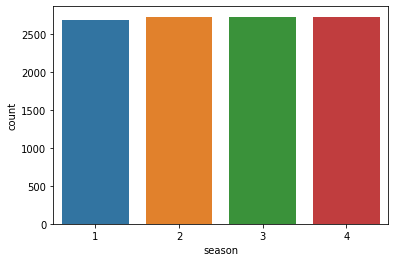

In [37]:
sns.countplot(x = "season" , data=df)
plt.show()

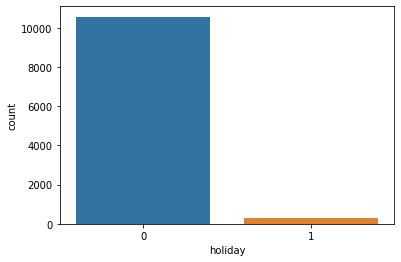

In [38]:
sns.countplot(x = "holiday" , data=df)
plt.show()


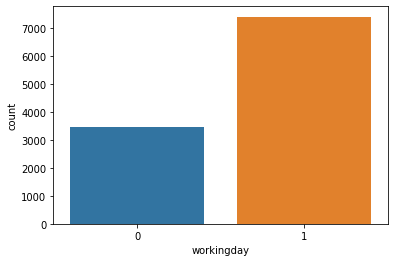

In [39]:
sns.countplot(x = "workingday" , data=df)
plt.show()

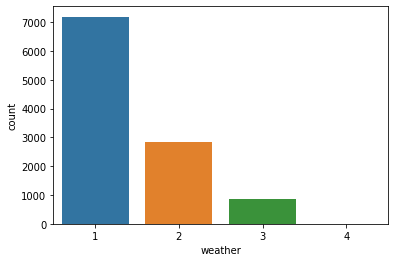

In [40]:
sns.countplot(x = "weather" , data=df)
plt.show()

***Insights***

1. There are 4 types of season such as :- (1: spring, 2: summer, 3: fall, 4: winter) which occur approximate equal times according to the given data.
2. There are 4 types of Weather in which weather type-1 occur mostly times and weather type-2 occur rarely times according to the given data.
3. According to the given data holiday occur only 2% 
4. According to the given data WorkingDay is approximately 2 times of Non-WorkingDay.


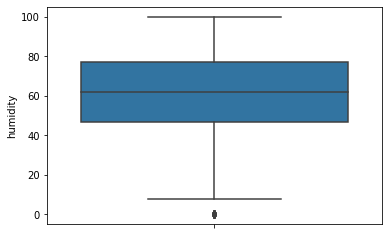

In [41]:
sns.boxplot(y="humidity" , data=df)
plt.show()

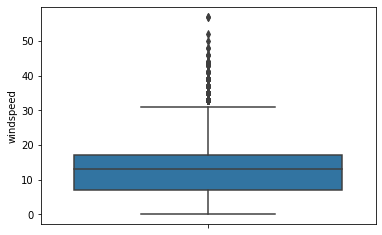

In [42]:
sns.boxplot(y="windspeed" , data=df)
plt.show()

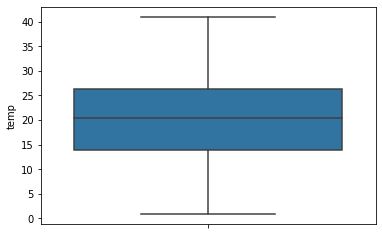

In [43]:
sns.boxplot(y="temp" , data=df)
plt.show()

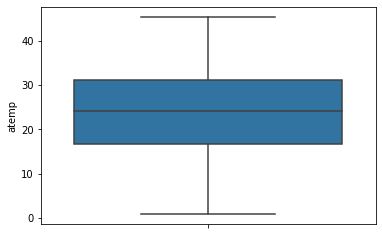

In [44]:
sns.boxplot(y="atemp" , data=df)
plt.show()

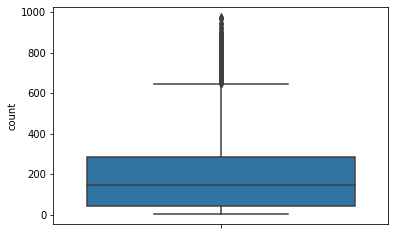

In [45]:
sns.boxplot(y="count" , data=df)
plt.show()

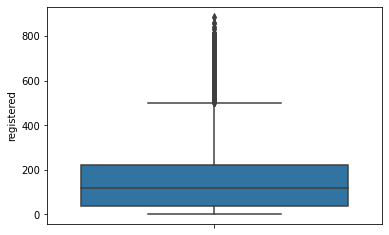

In [46]:
sns.boxplot(y="registered" , data=df)
plt.show()

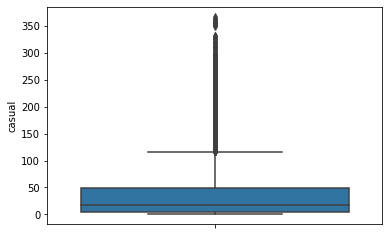

In [47]:
sns.boxplot(y="casual" , data=df)
plt.show()

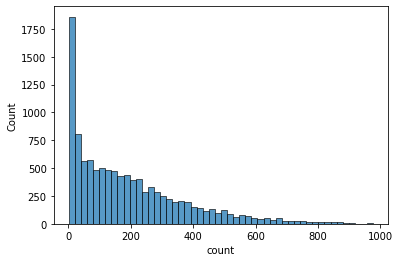

In [189]:
sns.histplot(x = "count" , data=df , bins=50)
plt.show()

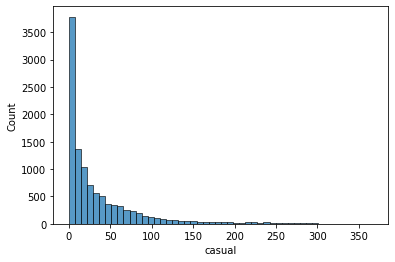

In [49]:
sns.histplot(x = "casual" , data=df , bins = 50)
plt.show()

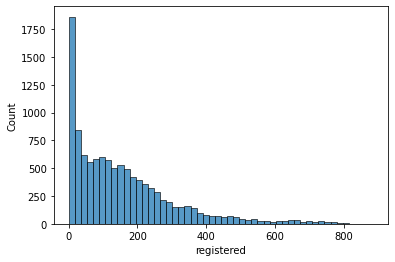

In [50]:
sns.histplot(x = "registered" , data = df , bins = 50)
plt.show()

***Comments***

1. From the Histogram plot of COUNT of TOTAL RENTAL BIKES including both casual and registered are Right-Skewed Normal Distributed curve in which "5" COUNT of TOTAL RENTAL BIKES maximum times occur i.e 169 times.

2. From the Histogram plot of COUNT of REGISTERED USERS are Right-Skewed Normal Distributed curve in which "3" COUNT of REGISTERED USERS maximum times occuri.e 195 times.

3. From the Histogram plot of COUNT of CASUAL USERS are Right-Skewed Normal Distributed curve in which "0" COUNT of CASUAL USERS maximum times occur i.e 986 times.

**Outliers**

1. Windspeed
2. Count
3. Casual
4. Registered

***Range***

1. Maximum Value of Temperature in Celsius is 41 and Minimum is 1.
2. Maximum Value of Feeling Temperature in Celsius is 46 and Minimum is 3.
3. Maximum Value of Humidity is 100 and Minimum is 0.
4. Maximum Value of WindSpeed is 57 and Minimum is 0.
5. Maximum Value of count of casual users is 367 and Minimum is 0.
6. Maximum Value of count of registered users is 886 and Minimum is 0
7. Maximum Value of count of total rental bikes including both casual and registered is 977 and Minimum is 1.

# ***Windspeed*** Outliers

In [193]:
df["windspeed"].mean()

12.7993954069447

In [51]:
a = np.percentile(df["windspeed"] , 25)
a

7.0015

In [52]:
b = np.percentile(df["windspeed"] , 50)
b

12.998

In [53]:
c = np.percentile(df["windspeed"] , 75)
c

16.9979

In [54]:
iqr = c-a
iqr

9.996400000000001

In [55]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [56]:
upper = (c+1.5*iqr)
upper

31.992500000000003

In [57]:
outlier = df[(df["windspeed"] < lower) | (df["windspeed"] > upper)]
len(outlier)

227

In [58]:
no_outlier = df[(df["windspeed"] >= lower) & (df["windspeed"] <= upper)]
len(no_outlier)

10659

In [59]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

2.085247106375161

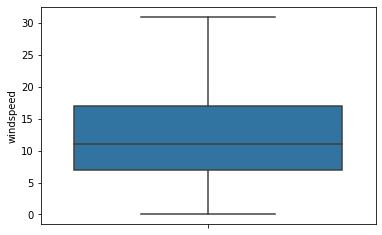

In [60]:
sns.boxplot(y = "windspeed" , data = no_outlier)
plt.show()

***Insights***

1. Minimum value of windspeed is 0.
2. Maximum value of windspeed is 32.
3. Median value of windspeed is 13.
4. Mean value of windspeed is approx 13.
5. The value of windspeed above 32 is Outliers.
6. There is total 2% of Outliers in windspeed.

# **Count** Outliers

In [195]:
df["count"].mean()

191.57413191254824

In [61]:
a = np.percentile(df["count"] , 25)
a

42.0

In [62]:
b = np.percentile(df["count"] , 50)
b

145.0

In [63]:
c = np.percentile(df["count"] , 75)
c

284.0

In [64]:
iqr = c-a
iqr

242.0

In [65]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [66]:
upper = (c+1.5*iqr)
upper

647.0

In [67]:
outlier = df[(df["count"] < lower) | (df["count"] > upper)]
len(outlier)

300

In [68]:
no_outlier = df[(df["count"] >= lower) & (df["count"] <= upper)]
len(no_outlier)

10586

In [69]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

2.75583318023149

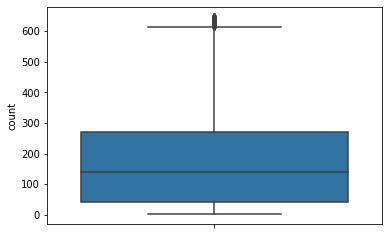

In [70]:
sns.boxplot(y = "count" , data = no_outlier)
plt.show()

***Insights***

1. Minimum value of COUNT is 0.
2. Maximum value of COUNT is 647.
3. Median value of COUNT is 145.
4. Mean value of COUNT is approx 192.
5. The value of COUNT above 647 is Outliers.
6. There is total 2.75% of Outliers in COUNT.

# **Casual** Outliers

In [196]:
df["casual"].mean()

36.02195480433584

In [71]:
a = np.percentile(df["casual"] , 25)
a

4.0

In [72]:
b = np.percentile(df["casual"] , 50)
b

17.0

In [73]:
c = np.percentile(df["casual"] , 75)
c

49.0

In [74]:
iqr = c-a
iqr

45.0

In [75]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [76]:
upper = (c+1.5*iqr)
upper

116.5

In [77]:
outlier = df[(df["casual"] < lower) | (df["casual"] > upper)]
len(outlier)

749

In [78]:
no_outlier = df[(df["casual"] >= lower) & (df["casual"] <= upper)]
len(no_outlier)

10137

In [79]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

6.880396839977953

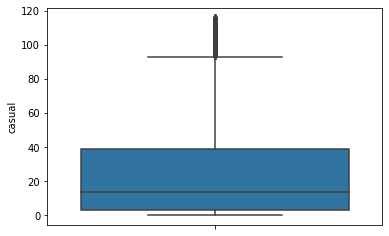

In [80]:
sns.boxplot(y = "casual" , data = no_outlier)
plt.show()

***Insights***

1. Minimum value of Casual Users is 0.
2. Maximum value of Casual Users is 117.
3. Median value of Casual Users is 17.
4. Mean value of Casual Users is approx 36.
5. The value of Casual Users above 117 is Outliers.
6. There is total 7% of Outliers in Casual Users.

# **Registered** Outliers

In [197]:
df["registered"].mean()

155.5521771082124

In [81]:
a = np.percentile(df["registered"] , 25)
a

36.0

In [82]:
b = np.percentile(df["registered"] , 50)
b

118.0

In [83]:
c = np.percentile(df["registered"] , 75)
c

222.0

In [84]:
iqr = c-a
iqr

186.0

In [85]:
lower = max((a-1.5*iqr) , 0)
lower

0

In [86]:
upper = (c+1.5*iqr)
upper

501.0

In [87]:
outlier = df[(df["registered"] < lower) | (df["registered"] > upper)]
len(outlier)

423

In [88]:
no_outlier = df[(df["registered"] >= lower) & (df["registered"] <= upper)]
len(no_outlier)

10463

In [89]:
percent_outlier = (len(outlier)/len(df))*100
percent_outlier

3.885724784126401

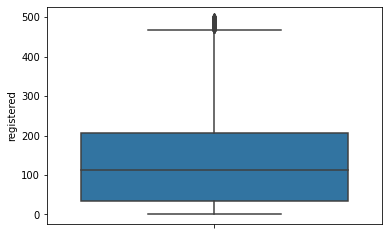

In [90]:
sns.boxplot(y = "registered" , data = no_outlier)
plt.show()

***Insights***

1. Minimum value of Registered Users is 0.
2. Maximum value of Registered Users is 501.
3. Median value of Registered Users is 118.
4. Mean value of Registered Users is approx 156.
5. The value of Registered Users above 501 is Outliers.
6. There is total 4% of Outliers in Registered Users.

# **Bivariate** Analysis

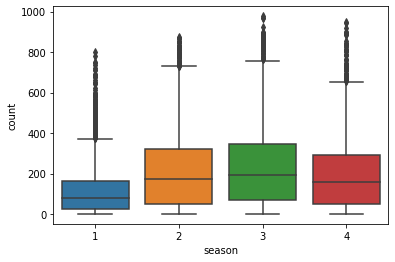

In [91]:
sns.boxplot(x = "season" , data = df , y = "count")
plt.show()

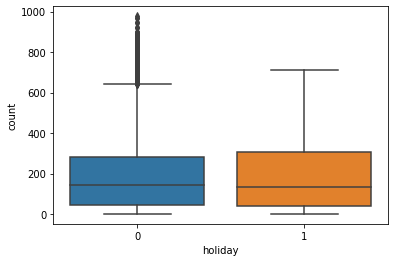

In [92]:
sns.boxplot(x = "holiday" , data = df , y = "count")
plt.show()

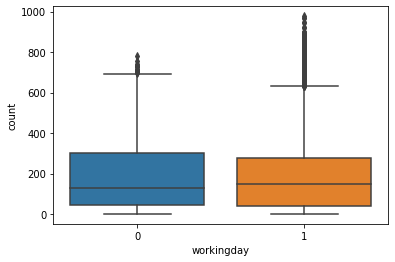

In [93]:
sns.boxplot(x = "workingday" , data = df , y = "count")
plt.show()

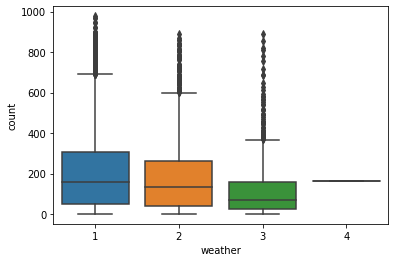

In [94]:
sns.boxplot(x = "weather" , data = df , y = "count")
plt.show()

***Comments***

1. In Season and Count , the **Mean and Median** value of Count of total rental bikes including both casual and registered is Maximum in Season-3 and Minimum in Season-1.

2. In Holiday and Count , the **Mean and Median** value of Count of total rental bikes including both casual and registered is almost equal in Holiday and Non-Holiday types.

3. In Working-Day and Count , the **Mean and Median** value of Count of total rental bikes including both casual and registered is slightly larger in Working Day wrt Non-Working Day.

4. In Weather and Count , the **Mean and Median** value of Count of total rental bikes including both casual and registered is Maximum in Weather type-1 and Minimum in Weather type-4.

# **Multivariate** Analysis

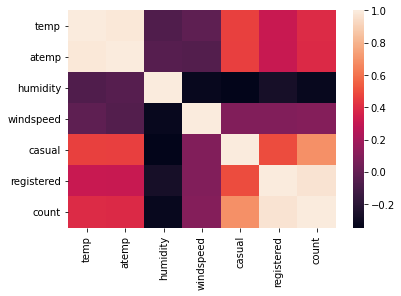

In [199]:
sns.heatmap(data = df.corr() , annot = False )
plt.show()

**Comments**

1. Temp and aTemp is dependent on each other i.e. it is highly cor-related.
2. Count and Registered is dependent on each other i.e. it is highly cor-related.
3. Count and Casual is dependent on each other but it is lightly cor-related.
4. Humidity is Negatively cor-related with Casual , Registered , Count and Windspeed

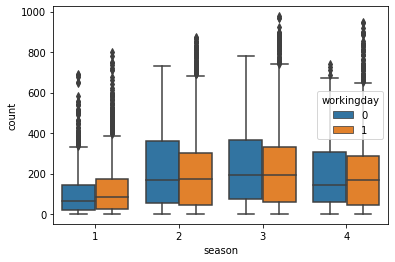

In [96]:
sns.boxplot(x = "season" , y = "count" , data = df , hue = "workingday")
plt.show()

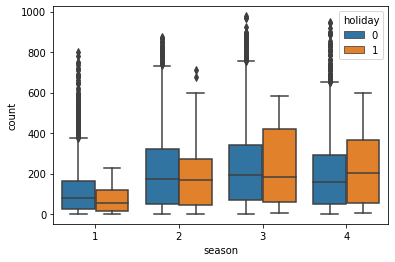

In [97]:
sns.boxplot(x = "season" , y = "count" , data = df , hue = "holiday")
plt.show()

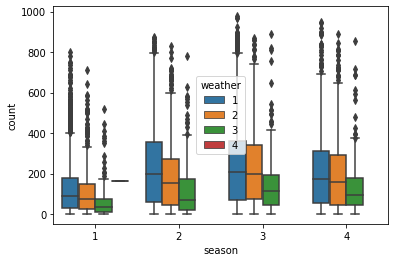

In [98]:
sns.boxplot(x = "season" , y = "count" , data = df , hue = "weather")
plt.show()

***Comments***

1. In Season and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly greater for Working day in all 4 seasons wrt Non-Workingday

2. In Season and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly lesser for Holiday in all 4 seasons wrt Non-Holiday.

3. In Season and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly greater for Weather type-1 in all 4 seasons and very low for Weather type-4 in all 4 seasons

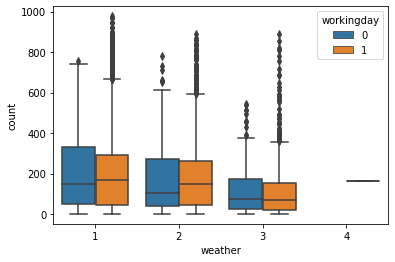

In [99]:
sns.boxplot(x = "weather" , y = "count" , data = df , hue = "workingday")
plt.show()

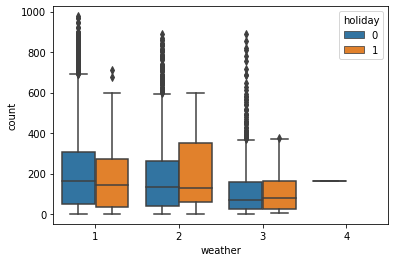

In [100]:
sns.boxplot(x = "weather" , y = "count" , data = df , hue = "holiday")
plt.show()

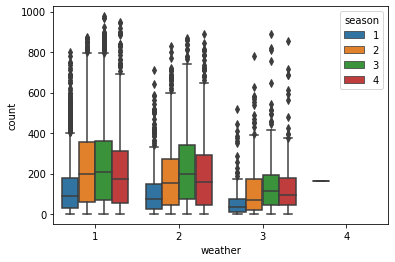

In [101]:
sns.boxplot(x = "weather" , y = "count" , data = df , hue = "season")
plt.show()

***Comments***

1. In Weather and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly greater for Working day in all 4 Weathers wrt Non-Workingday

2. In  Weather and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly lesser for Holiday in all 4 Weather wrt Non-Holiday.

3. In Season and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly greater for Season type-3 in all 4 Weathers and very low for Season type-1 in all 4 Weathers

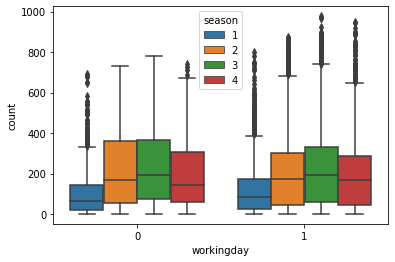

In [102]:
sns.boxplot(x = "workingday" , y = "count" , data = df , hue = "season")
plt.show()

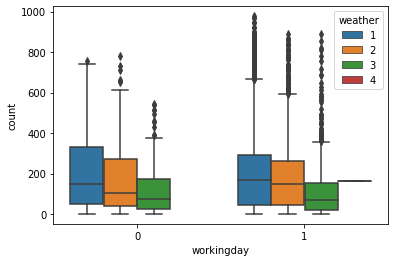

In [103]:
sns.boxplot(x = "workingday" , y = "count" , data = df , hue = "weather")
plt.show()

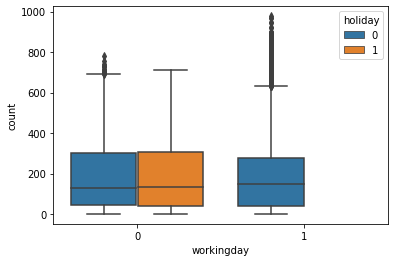

In [104]:
sns.boxplot(x = "workingday" , y = "count" , data = df , hue = "holiday")
plt.show()

***Comments***

1. In Working-Day and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly greater for Season type-3 in Working and Non-WorkingDay and very low for Season type-1 in Working and Non-WorkingDay

2. In  Working-Day  and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly greater for Weather type-1 in Working and Non-WorkingDay and very low for Weather type-4 in Working and Non-WorkingDay

3. In Working-Day and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is almost equal for Holiday and Non-Holiday in WorkingDay and Non-WorkingDay.

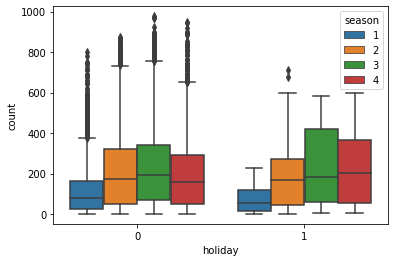

In [105]:
sns.boxplot(x = "holiday" , y = "count" , data = df , hue = "season")
plt.show()

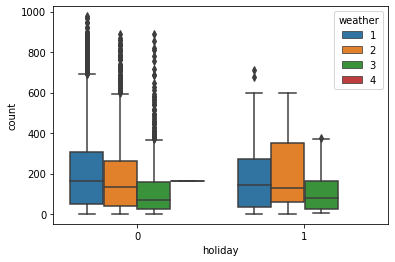

In [106]:
sns.boxplot(x = "holiday" , y = "count" , data = df , hue = "weather")
plt.show()

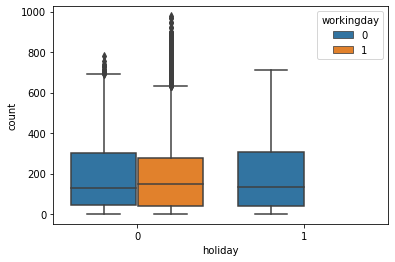

In [107]:
sns.boxplot(x = "holiday" , y = "count" , data = df , hue = "workingday")
plt.show()

***Comments***

1. In Holiday and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly greater for Season type-3 in Holiday and Non-Holiday and very low for Season type-1 in Holiday and Non-Holiday

2. In  Holiday  and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is slightly greater for Weather type-1 in Holiday and Non-Holiday and very low for Weather type-4 in Holiday and Non-Holiday

3. In Holiday and Count the **Mean and Median** of Count of total rental bikes including both casual and registered is almost equal for WorkingDay and Non-WorkingDay in Holiday and Non-Holiday. 

# **Chi-Square** Test

In [108]:
chi2.ppf(q = .90 , df = 1)

2.705543454095404

In [109]:
chi2.ppf(q = .90 , df = 3)

6.251388631170325

In [110]:
chi2.ppf(q = .90 , df = 9)

14.683656573259837

In [153]:
chi2.ppf(q = .95 , df = 1)

3.841458820694124

In [154]:
chi2.ppf(q = .95 , df = 3)

7.814727903251179

In [155]:
chi2.ppf(q = .95 , df = 9)

16.918977604620448

In [114]:
chi2.ppf(q = .99 , df = 1)

6.6348966010212145

In [115]:
chi2.ppf(q = .99 , df = 3)

11.344866730144373

In [116]:
chi2.ppf(q = .99 , df = 9)

21.665994333461924

***Season_Weather***

***Null Hypothesis*** - Season and Weather are independent.

***Alternate Hypothesis*** - Season and Weather are dependent.

In [117]:
season_weather = pd.crosstab(index = df["season"] , columns = df["weather"] , margins = True)
season_weather

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


In [118]:
chi2_contingency(season_weather)

(49.15865559689363,
 3.1185273325126814e-05,
 16,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01,
         2.68600000e+03],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01,
         2.73300000e+03],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01,
         2.73300000e+03],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01,
         2.73400000e+03],
        [7.19200000e+03, 2.83400000e+03, 8.59000000e+02, 1.00000000e+00,
         1.08860000e+04]]))

***Note*** - Reject Null Hypothesis because P-value is very low that means it is Statistcally Significant at 99% Confidence. So, Season and Weather are Dependent to each other

***Season_WorkingDay***

***Null Hypothesis*** - Season and WorkingDay are independent.

***Alternate Hypothesis*** - Season and WorkingDay are dependent.

In [119]:
season_workingday = pd.crosstab(index = df["season"] , columns = df["workingday"] , margins = True)
season_workingday

workingday,0,1,All
season,,,
1,858,1828,2686
2,840,1893,2733
3,888,1845,2733
4,888,1846,2734
All,3474,7412,10886


In [120]:
chi2_contingency(season_workingday)

(2.5708953973429574,
 0.9583429307736173,
 8,
 array([[  857.17104538,  1828.82895462,  2686.        ],
        [  872.16994305,  1860.83005695,  2733.        ],
        [  872.16994305,  1860.83005695,  2733.        ],
        [  872.48906853,  1861.51093147,  2734.        ],
        [ 3474.        ,  7412.        , 10886.        ]]))

***Note*** - Fail to Reject Null Hypothesis because P-value is very high that means it is NOT Statistcally Significant at 90% Confidence also. So, Season and WorkingDay are Independent to each other.

***Season_Holiday***

***Null Hypothesis*** - Season and Holiday are independent.

***Alternate Hypothesis*** - Season and Holiday are dependent.

In [121]:
season_holiday = pd.crosstab(index = df["season"] , columns = df["holiday"] , margins = True)
season_holiday

holiday,0,1,All
season,,,
1,2615,71,2686
2,2685,48,2733
3,2637,96,2733
4,2638,96,2734
All,10575,311,10886


In [122]:
chi2_contingency(season_holiday)

(20.82338817816167,
 0.0076316771368387095,
 8,
 array([[ 2609.26419254,    76.73580746,  2686.        ],
        [ 2654.92145875,    78.07854125,  2733.        ],
        [ 2654.92145875,    78.07854125,  2733.        ],
        [ 2655.89288995,    78.10711005,  2734.        ],
        [10575.        ,   311.        , 10886.        ]]))

***Note*** - Reject Null Hypothesis because P-value is very low that means it is Statistcally Significant at 99% Confidence. So, Season and Holiday are Dependent to each other.

***WorkingDay_Holiday***

***Null Hypothesis*** - WorkingDay and Holiday are independent.

***Alternate Hypothesis*** - WorkingDay and Holiday are dependent.

In [123]:
workingday_holiday = pd.crosstab(index = df["workingday"] , columns = df["holiday"] , margins = True)
workingday_holiday

holiday,0,1,All
workingday,,,
0,3163,311,3474
1,7412,0,7412
All,10575,311,10886


In [124]:
chi2_contingency(workingday_holiday)

(683.0522708237211,
 1.628462190086869e-146,
 4,
 array([[ 3374.75197501,    99.24802499,  3474.        ],
        [ 7200.24802499,   211.75197501,  7412.        ],
        [10575.        ,   311.        , 10886.        ]]))

***Note*** - Reject Null Hypothesis because P-value is very low that means it is Statistcally Significant at 99% Confidence. So, WorkingDay and Holiday are Dependent to each other.

***WorkingDay_Weather***

***Null Hypothesis*** - WorkingDay and Weather are independent.

***Alternate Hypothesis*** - WorkingDay and Weather are dependent.

In [125]:
workingday_weather = pd.crosstab(index = df["workingday"] , columns = df["weather"] , margins = True)
workingday_weather

weather,1,2,3,4,All
workingday,,,,,
0,2353,897,224,0,3474
1,4839,1937,635,1,7412
All,7192,2834,859,1,10886


In [126]:
chi2_contingency(workingday_weather)

(16.162518725276595,
 0.04011216628542262,
 8,
 array([[2.29515047e+03, 9.04401617e+02, 2.74128789e+02, 3.19125482e-01,
         3.47400000e+03],
        [4.89684953e+03, 1.92959838e+03, 5.84871211e+02, 6.80874518e-01,
         7.41200000e+03],
        [7.19200000e+03, 2.83400000e+03, 8.59000000e+02, 1.00000000e+00,
         1.08860000e+04]]))

***Note*** - Reject Null Hypothesis because P-value is very low that means it is Statistcally Significant at 95% Confidence. So, WorkingDay and Weather are Dependent to each other.

***Holiday_Weather***

***Null Hypothesis*** - Holiday and Weather are independent.

***Alternate Hypothesis*** - Holiday and Weather are dependent.

In [127]:
holiday_weather = pd.crosstab(index = df["holiday"] , columns = df["weather"] , margins = True)
holiday_weather

weather,1,2,3,4,All
holiday,,,,,
0,6988,2742,844,1,10575
1,204,92,15,0,311
All,7192,2834,859,1,10886


In [128]:
chi2_contingency(holiday_weather)

(5.406882723976633,
 0.7133333220493984,
 8,
 array([[6.98653316e+03, 2.75303601e+03, 8.34459397e+02, 9.71431196e-01,
         1.05750000e+04],
        [2.05466838e+02, 8.09639904e+01, 2.45406026e+01, 2.85688040e-02,
         3.11000000e+02],
        [7.19200000e+03, 2.83400000e+03, 8.59000000e+02, 1.00000000e+00,
         1.08860000e+04]]))

***Note*** - Fail to Reject Null Hypothesis because P-value is very high that means it is NOT Statistcally Significant at 90% Confidence also. So, Holiday and Weather are Independent to each other.

# **ANNOVA**

***Season***

***Null Hypothesis*** -  No. of cycles rented is similar for All 4 different Season.

***Alternate Hypothesis*** - No. of cycles rented is different for  All 4 different Season.

In [129]:
a = df[df["season"] == 1]["count"]
b = df[df["season"] == 2]["count"]
c = df[df["season"] == 3]["count"]
d = df[df["season"] == 4]["count"]

In [130]:
f_oneway(a,b,c,d)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

***Note*** - Reject Null Hypothesis that means it is Statistically Significant at 99% Confidence because P-value is ver low i.e. No. of cycles rented is similar for All 4 different Season.

***Weather***

***Null Hypothesis*** -  No. of cycles rented is similar for All 4 different Weather.

***Alternate Hypothesis*** - No. of cycles rented is different for  All 4 different Weather.

In [131]:
w = df[df["weather"] == 1]["count"]
x = df[df["weather"] == 2]["count"]
y = df[df["weather"] == 3]["count"]
z = df[df["weather"] == 4]["count"]

In [132]:
f_oneway(w,x,y,z)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

***Note*** - Reject Null Hypothesis that means it is Statistically Significant at 99% Confidence because P-value is very low i.e. No. of cycles rented is similar for All 4 different Weather.

# **2-Sample  T-test** 

**Holiday**

In [133]:
df.groupby(["holiday"])["count"].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

In [134]:
df.groupby(["holiday"])["count"].std()

holiday
0    181.513131
1    168.300531
Name: count, dtype: float64

In [135]:
df.groupby(["holiday"])["count"].max()

holiday
0    977
1    712
Name: count, dtype: int64

In [136]:
df.groupby(["holiday"])["count"].min()

holiday
0    1
1    1
Name: count, dtype: int64

In [137]:
yes_holiday = df[df["holiday"] == 1]
not_holiday = df[df["holiday"] == 0]

***Null Hypothesis*** -  Mean of Count of Holiday and Non-Holiday is assume equal i.e. M1 = M2

***Alternate Hypothesis*** - Mean of Count of Holiday and Non-Holiday is assume NOT equal i.e. M1 != M2

In [138]:
ttest_ind(yes_holiday["count"] , not_holiday["count"])

Ttest_indResult(statistic=-0.5626388963477119, pvalue=0.5736923883271103)

***Note*** - Fail to Reject Null Hypothesis because P-value is High. So, we can say it is not statistically significant at 90% Confidence also that means Mean of Count of Holiday and Non-Holiday is equal i.e M1 = M2


***Null Hypothesis*** -  Mean of Count of Holiday and Non-Holiday is assume equal i.e. M1 = M2

***Alternate Hypothesis*** - Mean of Count of Holiday is greater than Non-Holiday  i.e. M1 > M2

In [140]:
ttest_ind(yes_holiday["count"] , not_holiday["count"] , alternative = "greater")

Ttest_indResult(statistic=-0.5626388963477119, pvalue=0.7131538058364448)

***Note*** - Fail to Reject Null Hypothesis because P-value is High. So, we can say that it is not statistically significant at 90% Confidence also that means Mean of Count of Holiday and Non-Holiday is equal i.e M1 = M2

***Null Hypothesis*** -  Mean of Count of Holiday and Non-Holiday is assume equal i.e. M1 = M2

***Alternate Hypothesis*** - Mean of Count of Holiday is lesser than Non-Holiday  i.e. M1 < M2

In [141]:
ttest_ind(yes_holiday["count"] , not_holiday["count"] , alternative = "less")

Ttest_indResult(statistic=-0.5626388963477119, pvalue=0.28684619416355517)

***Note*** - Fail to Reject Null Hypothesis because P-value is High. So, we can say that it is not statistically significant at 90% Confidence also that means Mean of Count of Holiday and Non-Holiday is equal i.e M1 = M2

**Working Day**

In [142]:
df.groupby(["workingday"])["count"].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [143]:
df.groupby(["workingday"])["count"].std()

workingday
0    173.724015
1    184.513659
Name: count, dtype: float64

In [144]:
df.groupby(["workingday"])["count"].min()

workingday
0    1
1    1
Name: count, dtype: int64

In [145]:
df.groupby(["workingday"])["count"].max()

workingday
0    783
1    977
Name: count, dtype: int64

In [146]:
workingday = df[df["workingday"] == 1]
weekendday = df[df["workingday"] == 0]

***Null Hypothesis*** -  Mean of Count of WorkingDay and WeekendDay is assume equal i.e. M1 = M2

***Alternate Hypothesis*** - Mean of Count of WorkingDay and WeekendDay is assume NOT equal i.e. M1 != M2

In [147]:
ttest_ind(workingday["count"] , weekendday["count"])

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

**Note** - Fail to Reject Null Hypothesis because P-value is High. So, we can say that it is not statistically significant at 90% Confidence also that means Mean of Count of WorkingDay and WeekendDay is equal i.e M1 = M2

***Null Hypothesis*** -  Mean of Count of WorkingDay and WeekendDay is assume equal i.e. M1 = M2

***Alternate Hypothesis*** - Mean of Count of WorkingDay is greater than WeekendDay  i.e. M1 > M2

In [149]:
ttest_ind(workingday["count"] , weekendday["count"] , alternative = "greater")

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.11322402113180674)

**Note** - Fail to Reject Null Hypothesis because P-value is High. So, we can say that it is not statistically significant at 90% Confidence also that means Mean of Count of WorkingDay and WeekendDay is equal i.e M1 = M2

***Null Hypothesis*** -  Mean of Count of WorkingDay and WeekendDay is assume equal i.e. M1 = M2

***Alternate Hypothesis*** - Mean of Count of WorkingDay is lesser than WeekendDay  i.e. M1 < M2

In [150]:
ttest_ind(workingday["count"] , weekendday["count"] , alternative = "less")

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.8867759788681933)

**Note** - Fail to Reject Null Hypothesis because P-value is High. So, we can say that it is not statistically significant at 90% Confidence also that means Mean of Count of WorkingDay and WeekendDay is equal i.e M1 = M2